In [1]:
import pandas as pd
import numpy as np

In [2]:
bank = pd.read_csv('^NSEBANK.csv')

In [3]:
bank.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-12,38719.601563,38851.449219,38604.601563,38727.550781,38727.550781,156100.0
1,2022-01-13,38717.550781,38717.550781,38376.148438,38469.949219,38469.949219,159200.0
2,2022-01-14,38302.351563,38448.050781,38007.750000,38370.398438,38370.398438,148600.0
3,2022-01-17,38212.550781,38617.500000,38138.250000,38216.148438,38216.148438,140300.0
4,2022-01-18,38337.398438,38855.550781,38095.398438,38210.300781,38210.300781,168800.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

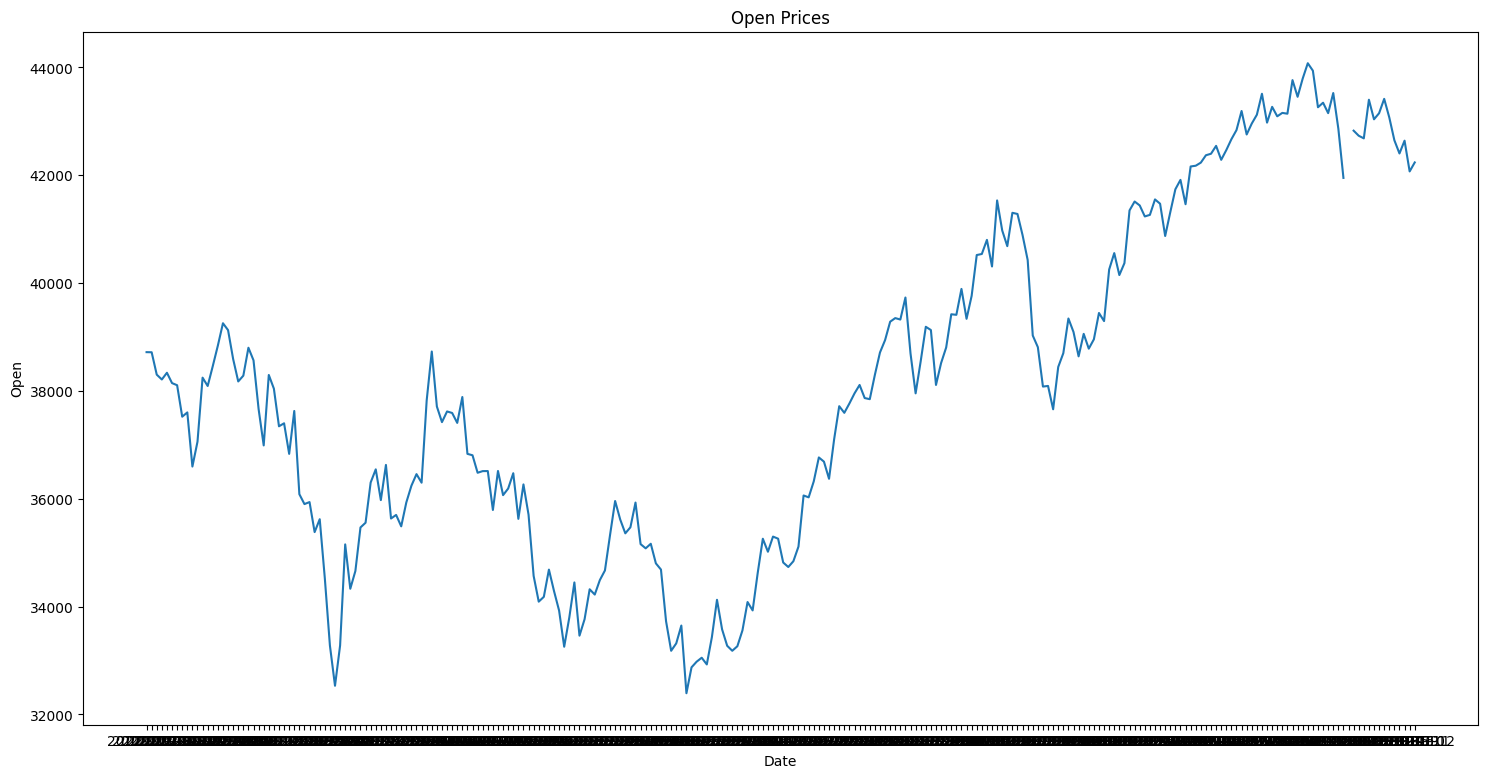

In [10]:
plt.figure(figsize=(18,9))
plt.title('Open Prices')
plt.xlabel('Date')
plt.ylabel('Open')
plt.plot('Date','Open',data=bank)
plt.show()

In [16]:
High = bank.loc[:,'High'].to_numpy()
Close = bank.loc[:,'Close'].to_numpy()

In [17]:
mid_price = (High+Close)/2

In [19]:
mid_price

array([38789.5      , 38593.75     , 38409.2246095, 38416.824219 ,
       38532.925781 , 38185.9257815, 38009.400391 , 37657.6503905,
       37321.125    , 37747.7753905, 38064.8750005, 38055.5488285,
       38096.3007815, 38654.0996095, 39358.5507815, 39217.4257815,
       39033.976563 , 38416.5      , 38125.275391 , 38629.199219 ,
       39104.074219 , 38653.75     , 37352.550781 , 38200.851563 ,
       38207.75     , 37828.074219 , 37708.3496095, 37870.0000005,
       37515.523438 , 37583.326172 , 35968.6250005, 36557.699219 ,
       36237.7753905, 35463.25     , 35374.2246095, 34752.7753905,
       33207.2753905, 33210.826172 , 33892.4746095, 34924.8750005,
       34713.1503905, 35373.6250005, 35333.2246095, 35777.3007815,
       36520.25     , 36309.3496095, 36408.675781 , 36487.476563 ,
       35742.400391 , 35563.7500005, 35740.6503905, 35912.2988285,
       36377.701172 , 36482.226563 , 37179.1503905, 38700.525391 ,
       38413.574219 , 37750.6503905, 37766.6250005, 37818.125 

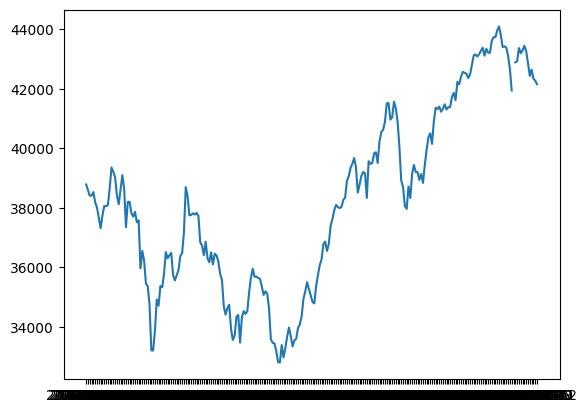

In [21]:
plt.plot(bank['Date'],mid_price)
plt.show()

In [22]:
bank.dropna(inplace=True)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
high_val = High
close_val = Close

In [27]:
training_data_len = round(len(close_val)*0.80)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_val.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

In [28]:
train_data

array([[0.53450403],
       [0.51197066],
       [0.50326258],
       [0.48976976],
       [0.48925824],
       [0.47447962],
       [0.45781587],
       [0.43362494],
       [0.37880077],
       [0.44521077],
       [0.4692968 ],
       [0.44369296],
       [0.46870635],
       [0.51508042],
       [0.58724626],
       [0.55921093],
       [0.53990998],
       [0.47046437],
       [0.473351  ],
       [0.5242433 ],
       [0.55929396],
       [0.51610824],
       [0.3753893 ],
       [0.48574187],
       [0.46682123],
       [0.42989398],
       [0.43579846],
       [0.44336084],
       [0.41589818],
       [0.41768285],
       [0.22839411],
       [0.33359427],
       [0.31387339],
       [0.2410515 ],
       [0.203569  ],
       [0.15663933],
       [0.02223149],
       [0.04732347],
       [0.10482413],
       [0.16257012],
       [0.16875001],
       [0.23574601],
       [0.21042236],
       [0.27389344],
       [0.3334019 ],
       [0.29753322],
       [0.326404  ],
       [0.308

In [30]:
xtrain = []
ytrain = []
for i in range(60,len(train_data)):
    xtrain.append(train_data[i-60:i,0])
    ytrain.append(train_data[i,0])

In [32]:
len(xtrain)

140

In [36]:
x_train, y_train = np.array(xtrain), np.array(ytrain)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [37]:
x_train

array([[[0.53450403],
        [0.51197066],
        [0.50326258],
        ...,
        [0.43874215],
        [0.43214233],
        [0.4491734 ]],

       [[0.51197066],
        [0.50326258],
        [0.48976976],
        ...,
        [0.43214233],
        [0.4491734 ],
        [0.43708015]],

       [[0.50326258],
        [0.48976976],
        [0.48925824],
        ...,
        [0.4491734 ],
        [0.43708015],
        [0.44876644]],

       ...,

       [[0.46239492],
        [0.47296181],
        [0.4699221 ],
        ...,
        [0.74402108],
        [0.75946463],
        [0.73248343]],

       [[0.47296181],
        [0.4699221 ],
        [0.44947956],
        ...,
        [0.75946463],
        [0.73248343],
        [0.7602167 ]],

       [[0.4699221 ],
        [0.44947956],
        [0.46391717],
        ...,
        [0.73248343],
        [0.7602167 ],
        [0.75861176]]])

In [39]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = close_val[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [40]:
x_test

array([[[0.44947956],
        [0.46391717],
        [0.49162857],
        ...,
        [0.7602167 ],
        [0.75861176],
        [0.74611156]],

       [[0.46391717],
        [0.49162857],
        [0.4960419 ],
        ...,
        [0.75861176],
        [0.74611156],
        [0.7593816 ]],

       [[0.49162857],
        [0.4960419 ],
        [0.54782635],
        ...,
        [0.74611156],
        [0.7593816 ],
        [0.75589119]],

       ...,

       [[0.5850683 ],
        [0.63885133],
        [0.67369219],
        ...,
        [0.87400262],
        [0.83727253],
        [0.87173274]],

       [[0.63885133],
        [0.67369219],
        [0.67845506],
        ...,
        [0.83727253],
        [0.87173274],
        [0.82204765]],

       [[0.67369219],
        [0.67845506],
        [0.65451801],
        ...,
        [0.87173274],
        [0.82204765],
        [0.84111249]]])

In [42]:
! pip install tensorflow

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

In [46]:
model = keras.Sequential()
model.add(layers.LSTM(100,return_sequences = True , input_shape = (x_train.shape[1],1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()
          

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
140/140 [==============================] - 10s 33ms/step - loss: 0.0169
Epoch 2/3
140/140 [==============================] - 5s 32ms/step - loss: 0.0078
Epoch 3/3
140/140 [==============================] - 4s 32ms/step - loss: 0.0049


In [54]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2/2 [==============================] - 0s 16ms/step


nan

In [49]:
predictions

array([[40829.023],
       [40811.664],
       [40799.52 ],
       [40900.402],
       [41054.035],
       [41156.72 ],
       [41348.74 ],
       [41519.453],
       [41716.625],
       [41917.44 ],
       [42051.094],
       [42115.816],
       [42107.438],
       [42092.44 ],
       [42142.047],
       [42293.008],
       [42429.465],
       [42538.86 ],
       [42617.7  ],
       [42707.52 ],
       [42785.508],
       [42798.785],
       [42838.34 ],
       [42827.33 ],
       [42788.14 ],
       [42872.03 ],
       [42996.727],
       [43132.086],
       [43301.523],
       [43469.832],
       [43454.16 ],
       [43292.004],
       [43150.613],
       [43033.203],
       [42768.113],
       [42457.812],
       [42019.676],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan]],

In [53]:
len(x_test),len(predictions)

(50, 50)

In [55]:
predicted_values = pd.DataFrame(predictions)

In [56]:
predicted_values.dropna(inplace=True)

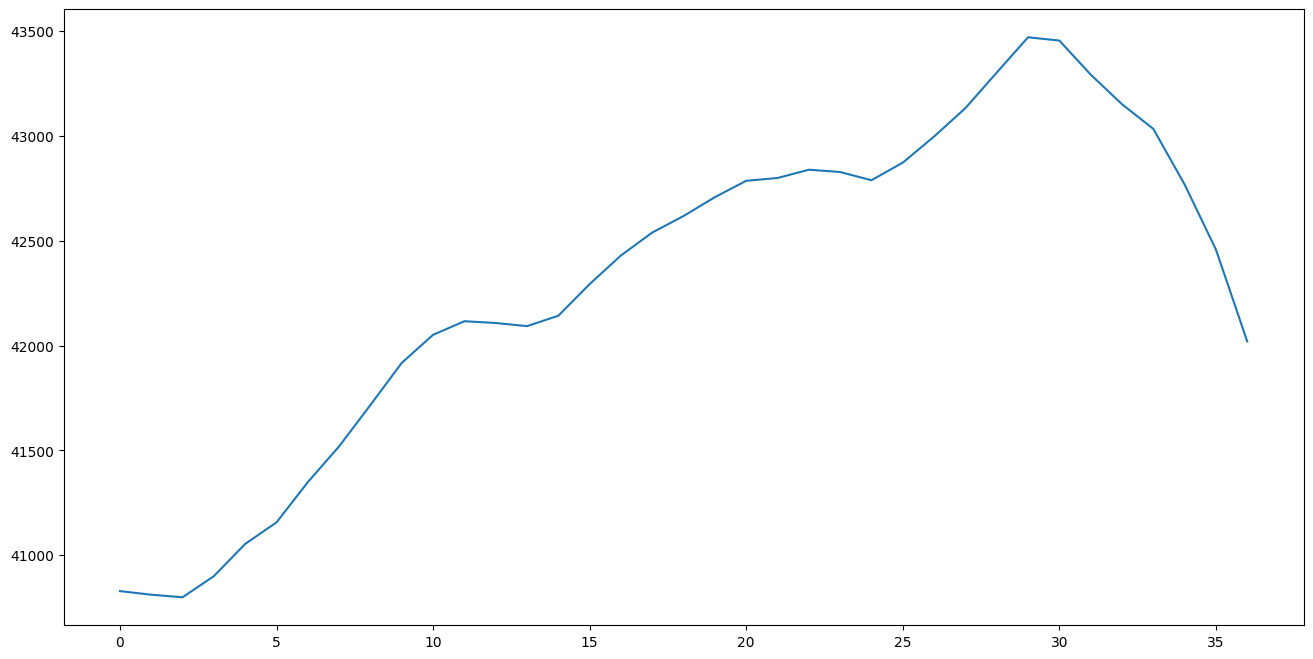

In [59]:
plt.figure(figsize=(16,8))
plt.plot(predicted_values)
